
## Project TED Talks

Title: TED Talks Analysis

Author: Tay Jian Zhen

Date: 25 April 2020

Purpose: To find out what feature makes the best TED Talk stands out.

Methodology: Find the correlation between rating/tags and views

Findings: Inspiring & Fascinating talks have the highest correlation. Business and culture related talks stands out among other topics in the top 100 talks. 

Recommendation/Conclusion: New ideas on 'Business Culture' that are 'Facinating' and 'Inspiring' will get the most attention from the TED Talks audiences.


Data Source: https://www.kaggle.com/rounakbanik/ted-talks

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [306]:
# read csv into dataframe
ted_df = pd.read_csv('ted-talks/ted_main.csv')
transcript_df = pd.read_csv('ted-talks/transcripts.csv')

In [21]:
## check the content of transcript
transcript_df.head(3)

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...


In [124]:
## check the content of ted_df
ted_df.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [104]:
# rough big picture of the data
ted_df.shape

(2550, 17)

In [13]:
# notice the rating are not as per column. 
ted_df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


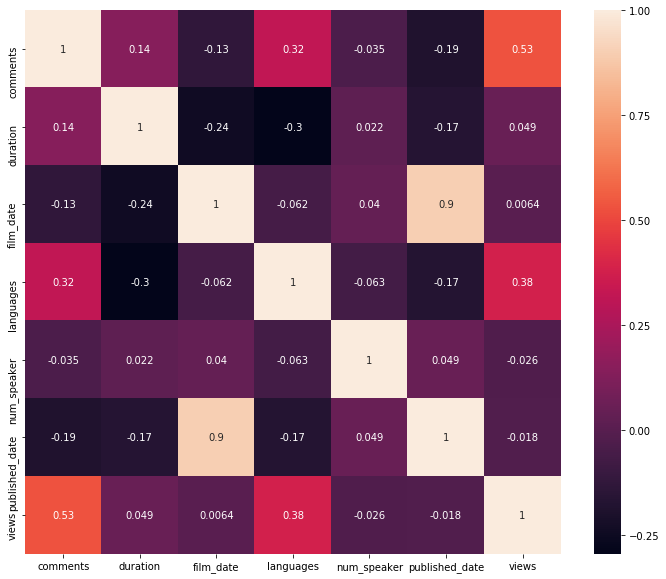

In [125]:
plt.figure(figsize=(12, 10))
sns.heatmap(ted_df.corr(), annot=True)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

# First level finding
We first plot out the correlation heatmap to see if there are any strong correlation between any of the existing dates. Since most available values does not have very strong correlation with views. We should explore the other 2 fields (rating & tags) stored as list and list of dictionary.

# Rating
Since rating are being stored as a string, we first open up the list of dictionary and populate them into each of their own column

In [313]:
# notice the rating are not as per column. Split each rating into a column in dataframe
# find all the distinct rating names

rating_list = []

for index, row in ted_df.iterrows():
    
    # get rating in string and convert to list
    ratings_str = row['ratings']
    ratings = ast.literal_eval(ratings_str)
    
    # append to list if not exist
    for rating in ratings:
        if rating['name'] not in rating_list:
            rating_list.append(rating['name'])


print(rating_list)

['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring']


In [308]:
# Add each rating type as column in the ted_rating_df dataframe
ted_rating_df = ted_df.copy()

for rating in rating_list:
    ted_rating_df[rating] = None

# total rating
ted_rating_df['total_rating'] = None


In [309]:
# Insert rating count into their respective column
for index, row in ted_rating_df.iterrows():
    
    # get rating in string and convert to list
    ratings_str = row['ratings']
    ratings = ast.literal_eval(ratings_str)
    rating_row_total = 0
    
    # insert rating count into column
    for rating in ratings:
        ted_rating_df.loc[index, rating['name']] = rating['count']
        rating_row_total += rating['count']
        
    # insert sum of all rating for each row
    ted_rating_df.loc[index, 'total_rating'] = rating_row_total;
    

In [108]:
# Available column for different rating type
ted_rating_df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'Funny', 'Beautiful', 'Ingenious', 'Courageous',
       'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing',
       'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring',
       'total_rating'],
      dtype='object')

In [310]:
# Extract column that we are interested 
rating_df = ted_rating_df.loc[:, ['title', 'main_speaker', 'speaker_occupation', 
                                  'views', 'Funny', 'Beautiful', 'Ingenious', 'Courageous', 
                                  'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing',
                                  'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring']]


In [311]:
# lets find out which type of rating correlate the best with the popularity of 
rating_corr_df = rating_df.corr(method='pearson').loc[:, 'views'].sort_values(ascending=False)
rating_corr_df = rating_corr_df.iloc[1:]
rating_corr_df

Inspiring       0.775339
Fascinating     0.774304
Informative     0.759691
Persuasive      0.725674
OK              0.701249
Ingenious       0.602629
Funny           0.594588
Courageous      0.556920
Beautiful       0.554991
Longwinded      0.452403
Jaw-dropping    0.441740
Confusing       0.410024
Unconvincing    0.279688
Obnoxious       0.252338
Name: views, dtype: float64

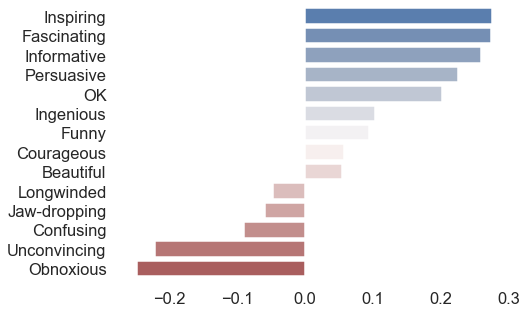

In [312]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots(figsize=(7, 5))

values = [value-0.5 for value in rating_corr_df.tolist()]

# sns.barplot(x=rating_corr_df.index.tolist(), y=y2, palette="vlag")
sns.barplot(x=values, y=rating_corr_df.index.tolist(), palette="vlag", orient='h')

# ax.axhline(0, color="k", clip_on=False)
sns.despine(left=True, bottom=True)


# Findings on Rating
Even though I initially thought 'Funny' would be a big factor on how popular the talk would be, I was mistaken. From the graph, we sees that 'Inspiring' and 'Facinating' comes first with 'Informative' and 'Persuaive' following close behind. While we obviously shouldn't let our presentation be 'Unconvincing' and 'Obnoxious'.

# Tags
As each talks only have a list of pre-determined tags, we cannot use the correlation method used in the Rating section. In this section we filter the total set down into top 100 and top 250 talks and compared them with all the talks. From there we see which tags stand out compared to the others.

In [304]:
# function that compute the top 10 tags from all the talks in dataset
def get_popular_tags(ted_tags_df):
    
    # notice the tags are in a list inside the cells. Open them up to evaluate
    tags_list = []

    for index, tags_str in ted_tags_df.items():

        # get tags in string to convert to list and append to tags_list
        tags = ast.literal_eval(tags_str)
        tags_list.append(tags)

    # convert to dataframe for easy count
    tag_df = pd.DataFrame(tags_list)
    top_tags = tag_df[0].value_counts().head(10)

    # remove TEDx tags as it exist in every talks
    top_tags = top_tags.drop(labels = 'TEDx')
    return top_tags


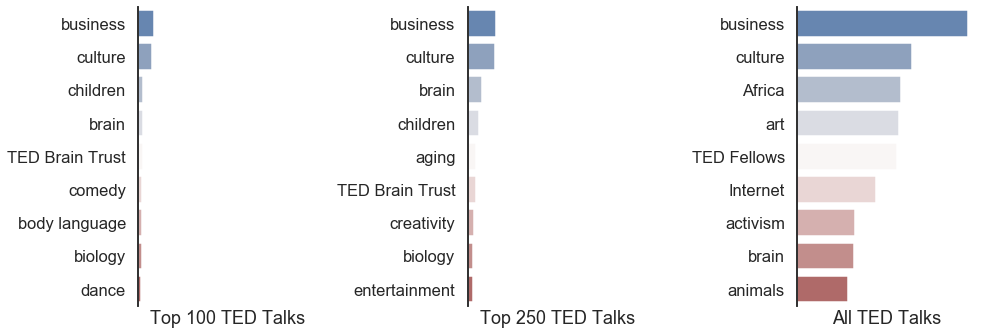

In [303]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5), sharex=True)


# all ted talks
ted_tags_df = ted_df.sort_values('views', ascending=False)['tags']
top_tags = get_popular_tags(ted_tags_df)

values = [value for value in top_tags.tolist()]
sns.barplot(x=values, y=top_tags.index.tolist(), palette="vlag", orient='h', ax=ax3)
ax3.set_xlabel("All TED Talks")



# top 250 ted talks
ted_tags_250_df = ted_df.sort_values('views', ascending=False)['tags'].head(250)
top_tags = get_popular_tags(ted_tags_250_df)

values = [value for value in top_tags.tolist()]
sns.barplot(x=values, y=top_tags.index.tolist(), palette="vlag", orient='h', ax=ax2)
ax2.set_xlabel("Top 250 TED Talks")



# top 100 ted talks
ted_tags_100_df = ted_df.sort_values('views', ascending=False)['tags'].head(100)
top_tags = get_popular_tags(ted_tags_100_df)

values = [value for value in top_tags.tolist()]
sns.barplot(x=values, y=top_tags.index.tolist(), palette="vlag", orient='h', ax=ax1)
ax1.set_xlabel("Top 100 TED Talks")



# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, xticks=[])
plt.tight_layout()


# Findings
After filtering down to top 100 and top 250 TED Talks, the remaining tags that are still relevant are 'Business' and 'Culture'. The rest of the tags like 'Africa' and 'art' fell short in comparison. 'Brain' and 'Children' are 2 interesting tags. They appear in less talks when we look generally, however when it comes to the top, they rise quickly to take the 3rd and 4th place.

# Fun Fact!
If we were ever invited to present a TED Talk, a new idea on 'Business Culture' that are 'Facinating' and 'Inspiring' will gives us the highest chance to go viral!